In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("application_record.csv")
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
data.shape

(438557, 18)

In [5]:
data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [16]:
data['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [13]:
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [19]:
data["OCCUPATION_TYPE"].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [29]:
non_unemployed = data[data["DAYS_EMPLOYED"]<0]

In [38]:
non_unemployed['DAYS_EMPLOYED_POS'] = non_unemployed['DAYS_EMPLOYED'].abs()
non_unemployed['DAYS_BIRTH_POS'] = non_unemployed['DAYS_BIRTH'].abs()

/var/folders/1v/d9hxqndn03v_fcs9vlm0c9yr0000gn/T/ipykernel_7274/3936136981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_unemployed['DAYS_EMPLOYED_POS'] = non_unemployed['DAYS_EMPLOYED'].abs()
/var/folders/1v/d9hxqndn03v_fcs9vlm0c9yr0000gn/T/ipykernel_7274/3936136981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_unemployed['DAYS_BIRTH_POS'] = non_unemployed['DAYS_BIRTH'].abs()


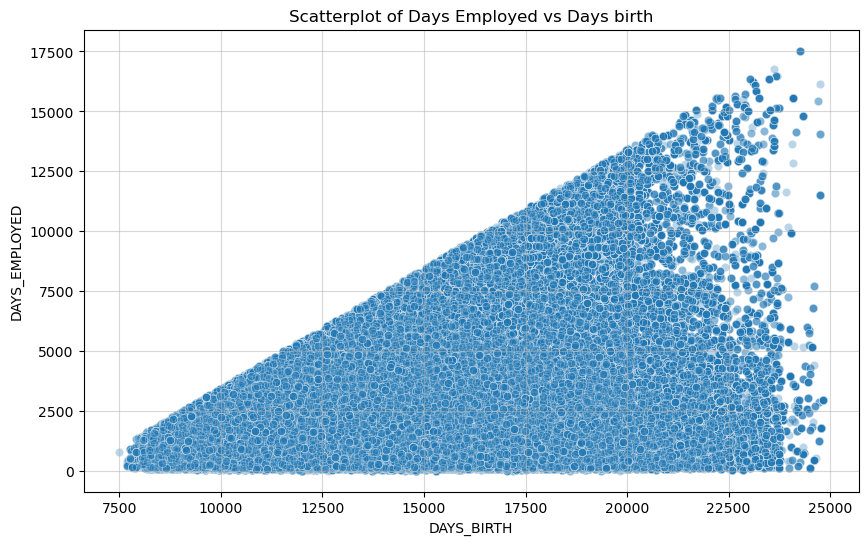

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=non_unemployed['DAYS_BIRTH_POS'],
    y=non_unemployed['DAYS_EMPLOYED_POS'],
    alpha=0.3, linewidth=0.5
)
plt.title("Scatterplot of Days Employed vs Days birth")
plt.xlabel("DAYS_BIRTH")
plt.ylabel("DAYS_EMPLOYED")
plt.grid(alpha=0.5)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


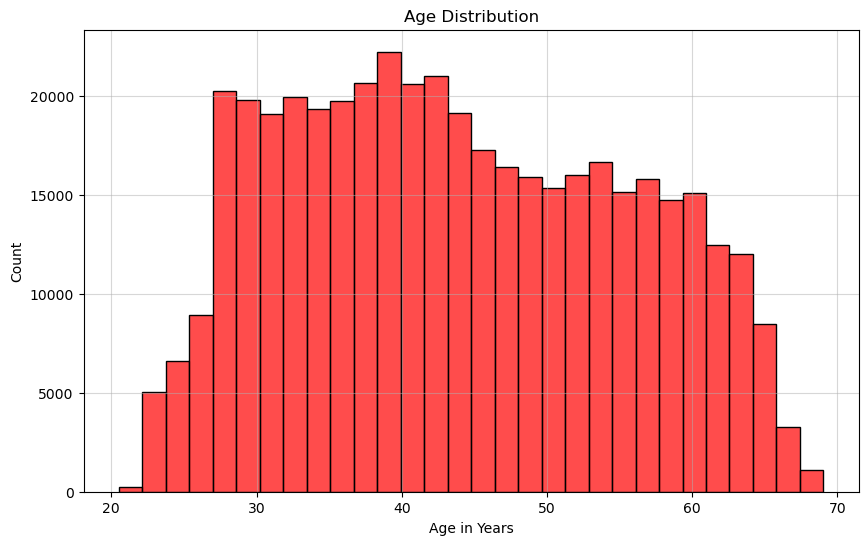

In [56]:
data['AGE_YEARS'] = (data['DAYS_BIRTH'].abs()) / 365

# Create a distribution plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE_YEARS'], bins=30, color="red", alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age in Years")
plt.ylabel("Count")
plt.grid(alpha=0.5)
plt.show()

In [74]:
data_sorted = data.sort_values(by="AMT_INCOME_TOTAL")
bottom_half = data_sorted.iloc[:len(data_sorted) // 2]

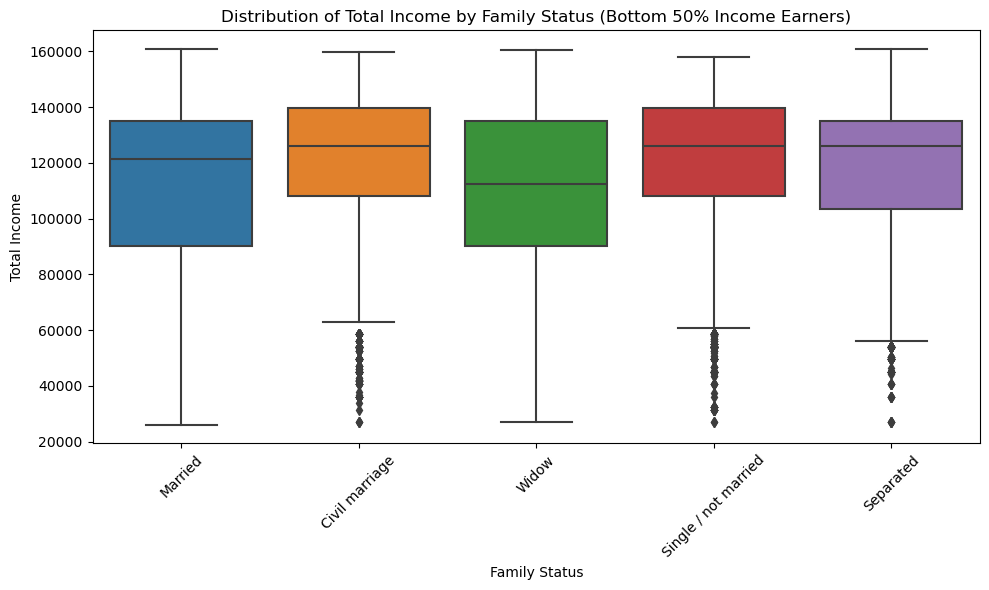

In [75]:
category_order = ["Married", "Civil marriage","Widow", "Single / not married", "Separated"]
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=bottom_half,
    x="NAME_FAMILY_STATUS",
    y="AMT_INCOME_TOTAL",
    order=category_order
)
plt.title("Distribution of Total Income by Family Status (Bottom 50% Income Earners)")
plt.xlabel("Family Status")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()